### 데이터에 범주형 변수가 포함되어 있으면  

- 대다수 지도 학습 모델이 학습되지 않거나 비정상적으로 학습됨
- str : 학습불가
- int/float : 학습은 되나 비정상적인 학습이 될 수 있음

- 코드화된 범주형 변수도 적절한 숫자로 변환해 줘야 함

#### 범주형 변수 판별  
- 상태공간의 크기가 유한한 변수가 범주형 변수
    - 반드시 도메인이나 변수의 상태공간을 바탕으로 판단해야 함
    - 월(month)은 숫자지만 범주형 변수 임

#### 범주형 변수 변환 방법

1. 더미화
    - 가장 일반적인 범주형 변수를 변환하는 방법
    - 문제점 : 범주형 변수의 상태공간 크기가 클 때, 더미화는 과하게 많은 변수를 추가해서 차원문제가 발생할 수 있음
    
    
2. 연속형 변수로 치환
    - 더미화의 차원 문제가 발생할 수 있을 때 사용
    - 라벨 정보를 활용하여 범주 변수를 연속형 변수로 치환하면 기존 변수가 가지는 정보가 일부 손실될 수 있고 활용이 어려울 수 있다는 단점이 있으나, 차원의 크기가 변하지 않으며 더 효율적인 변수로 변환할 수 있다는 장점이 있음


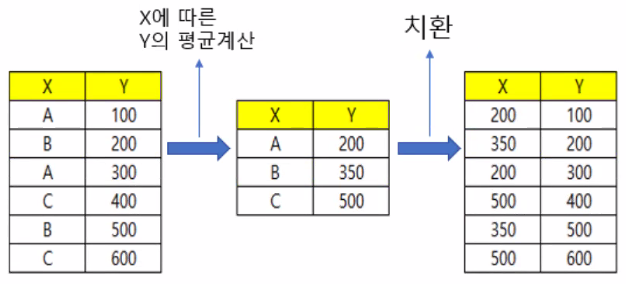

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
df = pd.read_csv('./data/car-good.csv')
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,negative
1,vhigh,vhigh,2,2,small,med,negative
2,vhigh,vhigh,2,2,small,high,negative
3,vhigh,vhigh,2,2,med,low,negative
4,vhigh,vhigh,2,2,med,med,negative


In [3]:
# 피처와 레이블 분리
X = df.drop('Class', axis=1)
Y = df['Class']

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    864 non-null    object
 1   Maint     864 non-null    object
 2   Doors     864 non-null    int64 
 3   Persons   864 non-null    int64 
 4   Lug_boot  864 non-null    object
 5   Safety    864 non-null    object
dtypes: int64(2), object(4)
memory usage: 40.6+ KB


In [5]:
# 모든 피처가 범주형 변수가 이기 때문에 일단 문자열로 변경
X = X.astype(str)
## astype 컬럼의 데이터 타입 변경

In [6]:
X['Buying'].value_counts()

med      216
high     216
vhigh    216
low      216
Name: Buying, dtype: int64

In [7]:
X['Doors'].value_counts()

3    288
4    288
2    288
Name: Doors, dtype: int64

In [8]:
# 원한 인코딩
d_x = pd.get_dummies(X)
d_x.head()

,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maint_high,Maint_low,Maint_med,Maint_vhigh,Doors_2,Doors_3,Doors_4,Persons_2,Persons_4,Lug_boot_big,Lug_boot_med,Lug_boot_small,Safety_high,Safety_low,Safety_med
0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1


In [9]:
# 학습데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(d_x, Y, random_state=4)

In [10]:
Train_Y.value_counts()

negative    631
positive     17
Name: Class, dtype: int64

In [11]:
# 타켓 데이터를 숫자로 치환
Train_Y.replace({"negative":-1, "positive":1}, inplace = True) # negative -> -1, positive -> 1
Test_Y.replace({"negative":-1, "positive":1}, inplace = True)

In [12]:
Train_Y[:5]

479   -1
282   -1
538   -1
35    -1
289   -1
Name: Class, dtype: int64

### 더미화 데이터로 모델 테스트
- 정확도는 타겟의 특성상 전부 -1로 예측해도 정확도가 상당히 높게 나옴

In [13]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)

from sklearn.metrics import f1_score
f1_score(Test_Y, pred_Y)

0.0

***결과설명***
- 너무 많은 더미 변수로 인해 모델이 패턴을 찾지 못함

### 연속형 변수로 치환

In [14]:
X = df.drop('Class', axis = 1)
Y = df['Class']

In [15]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, random_state=4)

In [16]:
Train_Y.replace({"negative":-1, "positive":1}, inplace = True)
Test_Y.replace({"negative":-1, "positive":1}, inplace = True)

##### 연속형 변수로 치환할 때 근거는 타겟변수의 값

In [17]:
## X와 Y변수를 다시 핪쳐서 치환을 진행
Train_df = pd.concat([Train_X, Train_Y], axis = 1)
Train_df.columns
Train_X.columns

Index(['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class'], dtype='object')

Index(['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'], dtype='object')

In [18]:
len(Train_df['Class'])
Train_df['Class'].sum()

648

-614

In [19]:
for col in Train_X.columns:
    temp_dict = Train_df.groupby(col)['Class'].mean().to_dict() 
    # col에 따른 Class의 평균을 나타내는 사전 (replace를 쓰기 위해, 사전으로 만듦)
    ## med/low 등 각각을 그룹하고 class에 있는 값을 -1,1등을 평균을 내서 평균으로 med/low등을 대체 
    print(Train_df.groupby(col).size())
    print(temp_dict)

Buying
high     153
low      166
med      167
vhigh    162
dtype: int64
{'high': -1.0, 'low': -0.8554216867469879, 'med': -0.9401197604790419, 'vhigh': -1.0}
Maint
high     167
low      151
med      156
vhigh    174
dtype: int64
{'high': -1.0, 'low': -0.8675496688741722, 'med': -0.9102564102564102, 'vhigh': -1.0}
Doors
2    223
3    211
4    214
dtype: int64
{2: -0.9551569506726457, 3: -0.9241706161137441, 4: -0.9626168224299065}
Persons
2    325
4    323
dtype: int64
{2: -1.0, 4: -0.8947368421052632}
Lug_boot
big      230
med      216
small    202
dtype: int64
{'big': -0.9391304347826087, 'med': -0.9259259259259259, 'small': -0.9801980198019802}
Safety
high    208
low     217
med     223
dtype: int64
{'high': -0.9230769230769231, 'low': -1.0, 'med': -0.9192825112107623}


In [20]:
for col in Train_X.columns: # 보통은 범주 변수만 순회
    temp_dict = Train_df.groupby(col)['Class'].mean().to_dict() 
    # col에 따른 Class의 평균을 나타내는 사전 (replace를 쓰기 위해, 사전으로 만듦)
    Train_df[col] = Train_df[col].replace(temp_dict) 
    # 변수 치환    
    Test_X[col] = Test_X[col].astype(str).replace(temp_dict) 
    # 테스트 데이터도 같이 치환해줘야 함 (나중에 활용하기 위해서는 저장도 필요)


<ipython-input-20-215d5f6befa9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_X[col] = Test_X[col].astype(str).replace(temp_dict)


In [21]:
Train_df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
479,-0.94012,-1.0,-0.962617,-0.894737,-0.980198,-0.923077,-1
282,-1.00000,-1.0,-0.955157,-0.894737,-0.925926,-1.000000,-1
538,-0.94012,-1.0,-0.962617,-0.894737,-0.939130,-0.919283,-1
35,-1.00000,-1.0,-0.924171,-0.894737,-0.939130,-0.923077,-1
289,-1.00000,-1.0,-0.924171,-1.000000,-0.980198,-0.919283,-1


In [22]:
Train_X = Train_df.drop('Class', axis = 1)
Train_Y = Train_df['Class']

In [23]:
# 치환한 뒤의 모델 테스트
model = KNN().fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)

f1_score(Test_Y, pred_Y)

## 타겟을 고려한 전처리이므로 더미화보다 좋은 결과가 나왔음

## 모델 성능 향상 확인 가능

0.20000000000000004